In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Integration

In [5]:
# Load all datasets
transactions = pd.read_csv("transactions_2019data.csv")
fraud_labels = pd.read_json("fraud_labels.json")
card_info = pd.read_csv("cards_data.csv")
users = pd.read_csv("users_data.csv")

In [6]:
# Drop sensitive or unnecessary columns from card_info
card_info = card_info.drop(columns=["card_number", "cvv"], errors="ignore")
#users
users = users.drop(columns=["address", "birth_year", "birth_month"])

In [7]:
# Step 1: Merge transactions with fraud labels using the transaction ID
# This adds the 'fraud' flag column to each transaction record.
df_step1 = transactions.merge(
    fraud_labels,
    left_on="id",
    right_on="transaction_id",
    how="left"
)

In [8]:
# Step 2: Merge the result with card information
# This links each transaction to its corresponding card details.
df_step2 = df_step1.merge(
    card_info,
    left_on="card_id",
    right_on="id",
    how="left",
    suffixes=("", "_card")
)

In [9]:
# Step 3: Merge with users dataset
# This connects transactions to the user who made them.
df_new = df_step2.merge(
    users,
    left_on="client_id",
    right_on="id",
    how="left",
    suffixes=("", "_user")
)

In [10]:
df_new.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,22326462,22326465,22326466,22326467,22326468,22326469,22326470,22326471,22326472,22326473,22326474,22326475,22326476,22326478,22326479
date,2019-01-01 00:02:00,2019-01-01 00:05:00,2019-01-01 00:06:00,2019-01-01 00:06:00,2019-01-01 00:10:00,2019-01-01 00:11:00,2019-01-01 00:11:00,2019-01-01 00:11:00,2019-01-01 00:13:00,2019-01-01 00:14:00,2019-01-01 00:14:00,2019-01-01 00:16:00,2019-01-01 00:18:00,2019-01-01 00:19:00,2019-01-01 00:23:00
client_id,496,1129,114,641,114,316,605,1842,1919,430,1963,487,1684,1053,114
card_id,3186,2677,5283,2774,5283,4125,5061,3743,4302,2860,3364,2024,3278,2900,5283
amount,$119.35,$100.00,$51.71,$105.30,$82.00,$90.15,$3.55,$8.87,$48.12,$140.00,$20.75,$41.39,$31.08,$167.39,$-82.00
use_chip,Chip Transaction,Chip Transaction,Chip Transaction,Swipe Transaction,Chip Transaction,Chip Transaction,Chip Transaction,Chip Transaction,Chip Transaction,Swipe Transaction,Chip Transaction,Chip Transaction,Online Transaction,Online Transaction,Chip Transaction
merchant_id,30286,27092,61195,75781,61195,75781,59935,17726,69972,27092,25759,98359,39021,17976,61195
merchant_city,Mesquite,Vista,North Hollywood,Columbus,North Hollywood,Houston,Brooklyn,Albuquerque,East Hampton,Crown Point,Vacaville,Albany,ONLINE,ONLINE,North Hollywood
merchant_state,TX,CA,CA,OH,CA,TX,NY,NM,NY,IN,CA,NY,NaN,NaN,CA
zip,75149.0,92084.0,91606.0,43228.0,91606.0,77051.0,11210.0,87121.0,11937.0,46307.0,95687.0,12203.0,NaN,NaN,91606.0


In [11]:
df_new.shape

(1159966, 36)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159966 entries, 0 to 1159965
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1159966 non-null  int64  
 1   date                   1159966 non-null  object 
 2   client_id              1159966 non-null  int64  
 3   card_id                1159966 non-null  int64  
 4   amount                 1159966 non-null  object 
 5   use_chip               1159966 non-null  object 
 6   merchant_id            1159966 non-null  int64  
 7   merchant_city          1159966 non-null  object 
 8   merchant_state         1018895 non-null  object 
 9   zip                    1009034 non-null  float64
 10  mcc                    1159966 non-null  int64  
 11  errors                 18654 non-null    object 
 12  transaction_id         777339 non-null   float64
 13  fraud                  777339 non-null   object 
 14  id_card           

In [13]:
df_new.isnull().sum()

id                             0
date                           0
client_id                      0
card_id                        0
amount                         0
use_chip                       0
merchant_id                    0
merchant_city                  0
merchant_state            141071
zip                       150932
mcc                            0
errors                   1141312
transaction_id            382627
fraud                     382627
id_card                        0
client_id_card                 0
card_brand                     0
card_type                      0
expires                        0
has_chip                       0
num_cards_issued               0
credit_limit                   0
acct_open_date                 0
year_pin_last_changed          0
card_on_dark_web               0
id_user                        0
current_age                    0
retirement_age                 0
gender                         0
latitude                       0
longitude 

In [14]:
#missing values in percentage 
df_new.isnull().sum()/df_new.shape[0] * 100

id                        0.000000
date                      0.000000
client_id                 0.000000
card_id                   0.000000
amount                    0.000000
use_chip                  0.000000
merchant_id               0.000000
merchant_city             0.000000
merchant_state           12.161650
zip                      13.011761
mcc                       0.000000
errors                   98.391849
transaction_id           32.986053
fraud                    32.986053
id_card                   0.000000
client_id_card            0.000000
card_brand                0.000000
card_type                 0.000000
expires                   0.000000
has_chip                  0.000000
num_cards_issued          0.000000
credit_limit              0.000000
acct_open_date            0.000000
year_pin_last_changed     0.000000
card_on_dark_web          0.000000
id_user                   0.000000
current_age               0.000000
retirement_age            0.000000
gender              

In [15]:
df_new.duplicated().sum()

np.int64(0)

Fixing Integration issues 

In [16]:
#1. Handling schema issues = redudnancy 
df_new = df_new.drop(columns=["client_id_card", "id_user", "id_card", "transaction_id"])

In [17]:
#check if it worked 
df_new.shape

(1159966, 32)

In [18]:
#renaming id to transaction_id for clarity
df_new = df_new.rename(columns={"id": "transaction_id"})

Missing Data

In [19]:
# merchant_state 12%
df_new["merchant_state"] = df_new["merchant_state"].fillna("Unknown")
#zip 13%
df_new["zip"] = df_new["zip"].fillna(-1)

In [20]:
# errors 98% missing, cant help 
df_new.drop(columns=["errors"], inplace=True)

In [21]:
#fraud 
df_new = df_new.dropna(subset=["fraud"])

Change data types

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777339 entries, 0 to 1159963
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         777339 non-null  int64  
 1   date                   777339 non-null  object 
 2   client_id              777339 non-null  int64  
 3   card_id                777339 non-null  int64  
 4   amount                 777339 non-null  object 
 5   use_chip               777339 non-null  object 
 6   merchant_id            777339 non-null  int64  
 7   merchant_city          777339 non-null  object 
 8   merchant_state         777339 non-null  object 
 9   zip                    777339 non-null  float64
 10  mcc                    777339 non-null  int64  
 11  fraud                  777339 non-null  object 
 12  card_brand             777339 non-null  object 
 13  card_type              777339 non-null  object 
 14  expires                777339 non-null  

In [23]:
# 1. Convert numeric-like objects → numeric
money_cols = [
    "amount",
    "credit_limit",
    "per_capita_income",
    "yearly_income",
    "total_debt"
]

for col in money_cols:
    # Only clean if column exists
    if col in df_new.columns:
        df_new[col] = (
            df_new[col]
            .astype(str)
            .str.replace(r"[\$,]", "", regex=True)
            .astype(float)
        )

print(df_new[money_cols].dtypes)


amount               float64
credit_limit         float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
dtype: object


In [24]:
# 2. Dates → datetime
df_new["date"] = pd.to_datetime(df_new["date"], errors="coerce")
df_new["expires"] = pd.to_datetime(df_new["expires"], errors="coerce")
df_new["acct_open_date"] = pd.to_datetime(df_new["acct_open_date"], errors="coerce")

C:\Users\ruqay\AppData\Local\Temp\ipykernel_29852\70123594.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new["expires"] = pd.to_datetime(df_new["expires"], errors="coerce")
C:\Users\ruqay\AppData\Local\Temp\ipykernel_29852\70123594.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new["acct_open_date"] = pd.to_datetime(df_new["acct_open_date"], errors="coerce")


In [25]:

df_new["fraud"] = (
    df_new["fraud"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)


df_new["has_chip"] = (
    df_new["has_chip"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)

df_new["card_on_dark_web"] = (
    df_new["card_on_dark_web"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)

In [26]:
df_new.head(5).T

,0,1,2,3,4
transaction_id,22326462,22326465,22326466,22326467,22326468
date,2019-01-01 00:02:00,2019-01-01 00:05:00,2019-01-01 00:06:00,2019-01-01 00:06:00,2019-01-01 00:10:00
client_id,496,1129,114,641,114
card_id,3186,2677,5283,2774,5283
amount,119.35,100.0,51.71,105.3,82.0
use_chip,Chip Transaction,Chip Transaction,Chip Transaction,Swipe Transaction,Chip Transaction
merchant_id,30286,27092,61195,75781,61195
merchant_city,Mesquite,Vista,North Hollywood,Columbus,North Hollywood
merchant_state,TX,CA,CA,OH,CA
zip,75149.0,92084.0,91606.0,43228.0,91606.0


Outliers

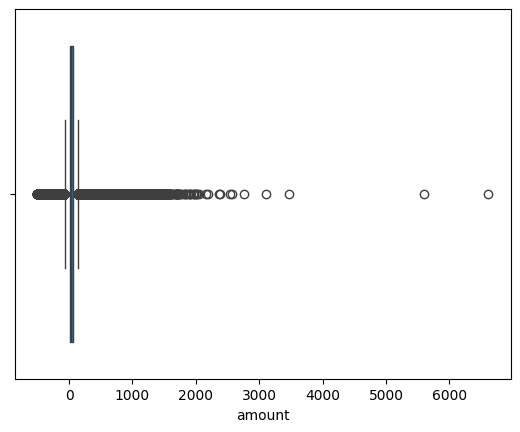

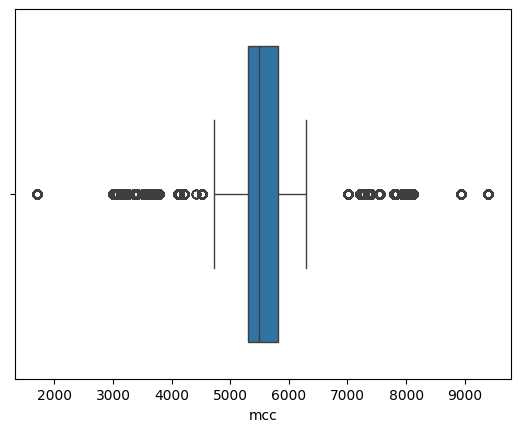

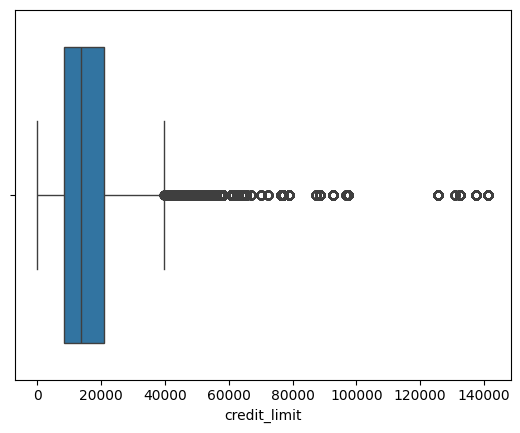

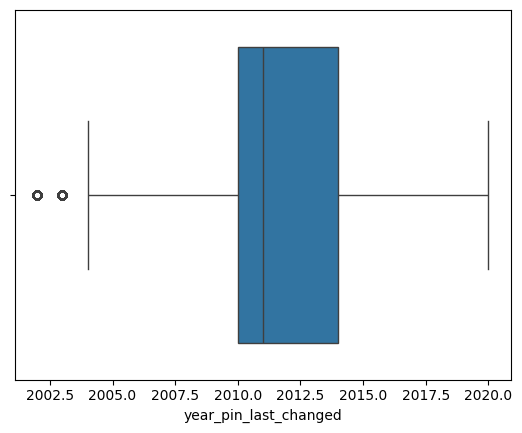

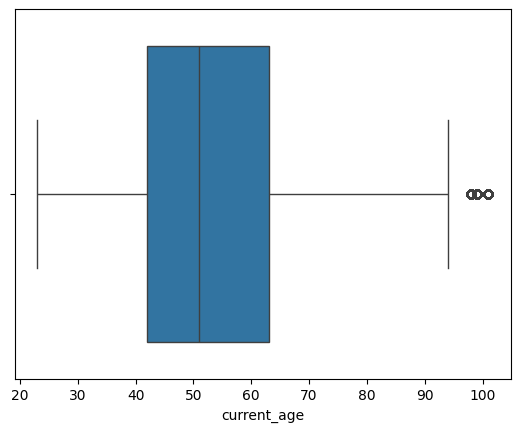

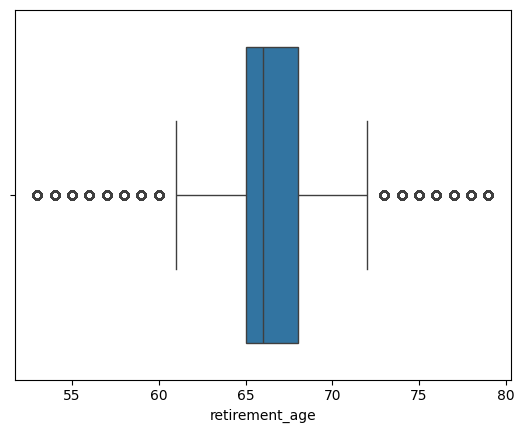

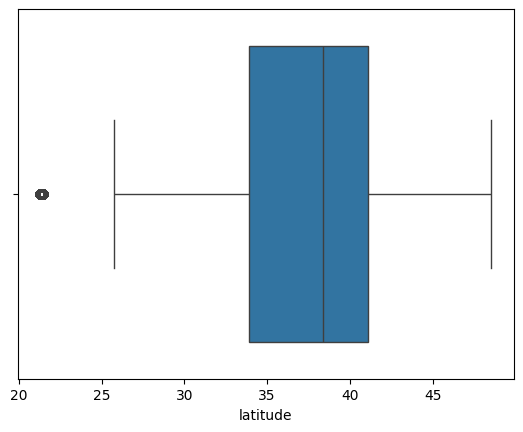

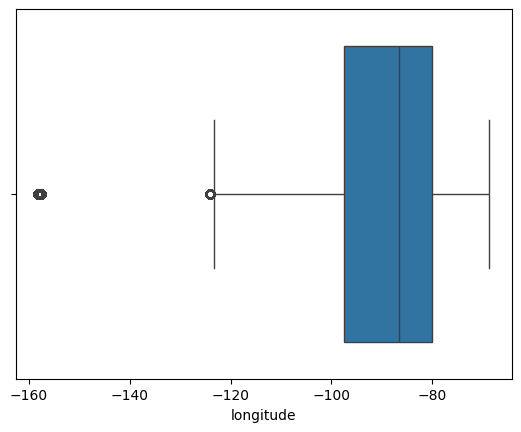

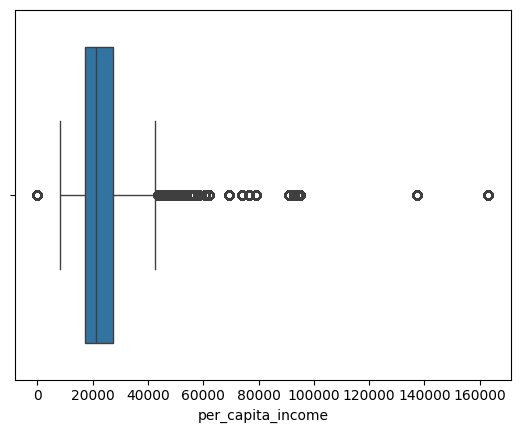

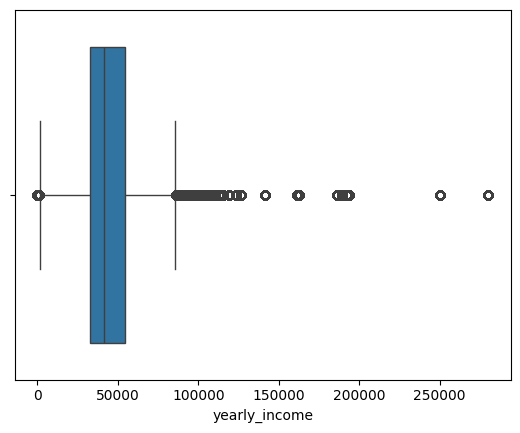

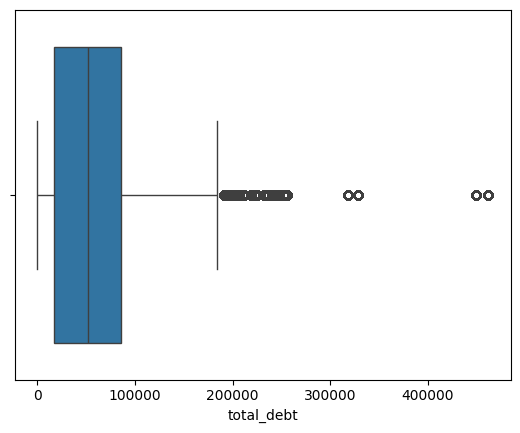

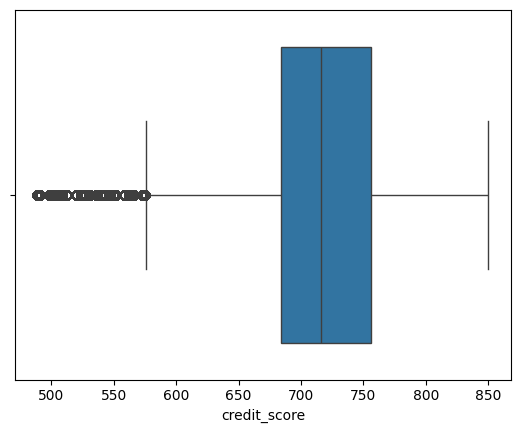

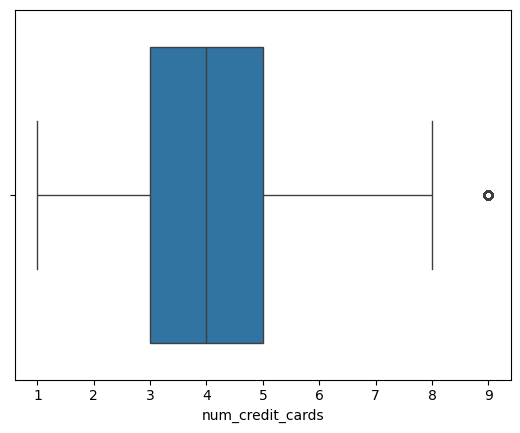

In [27]:
for i in ['amount',  'mcc', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income','total_debt', 'credit_score', 'num_credit_cards']:
    sns.boxplot(data=df_new, x=i)
    plt.show()

In [28]:
import numpy as np

def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw


In [29]:
df_new.columns


Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'fraud',
       'card_brand', 'card_type', 'expires', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web', 'current_age', 'retirement_age', 'gender',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [30]:
for i in ['amount',  'mcc', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income','total_debt', 'credit_score', 'num_credit_cards']:
    lw, uw = whisker(df_new[i])
    df_new[i] = np.where(df_new[i] < lw, lw, df_new[i])
    df_new[i] = np.where(df_new[i] > uw, uw, df_new[i])


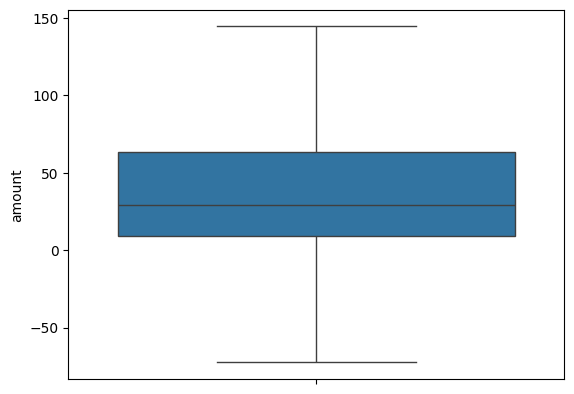

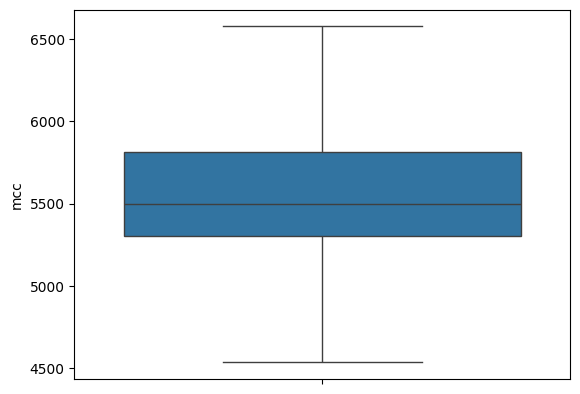

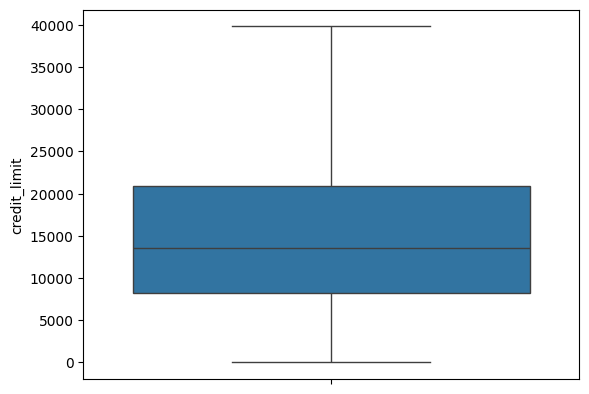

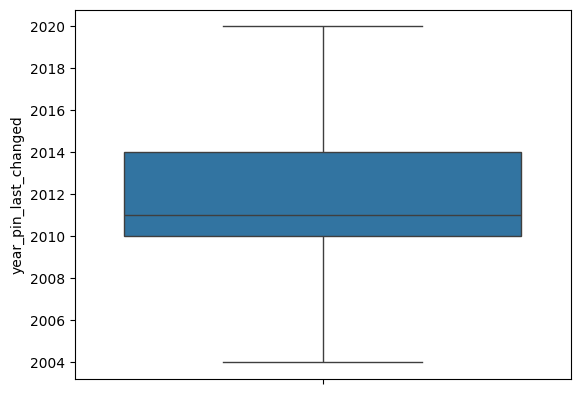

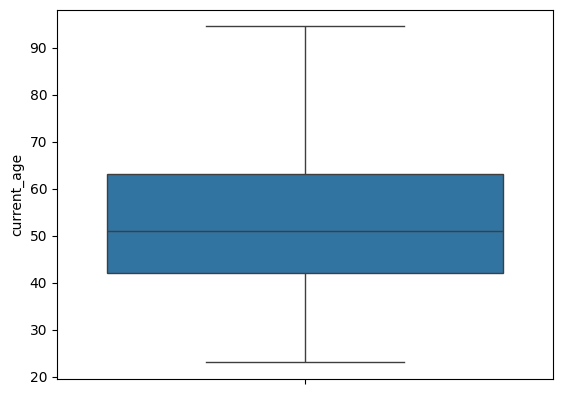

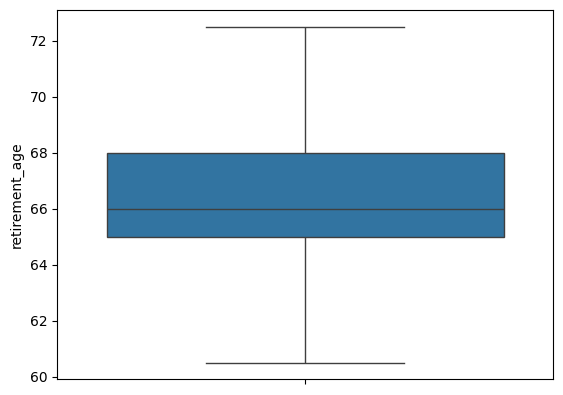

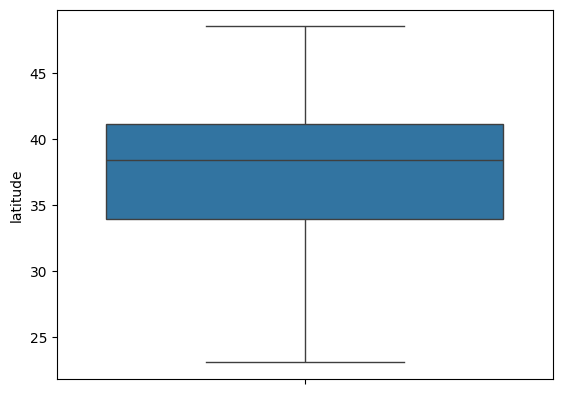

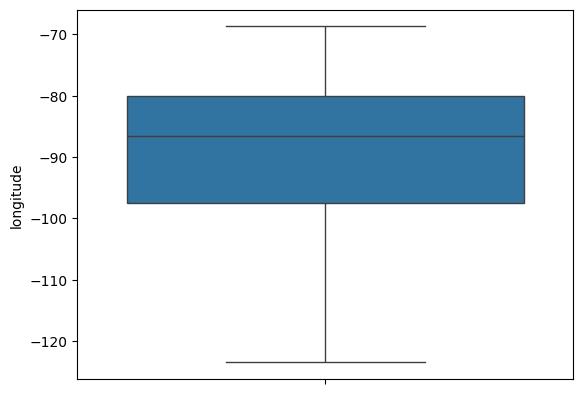

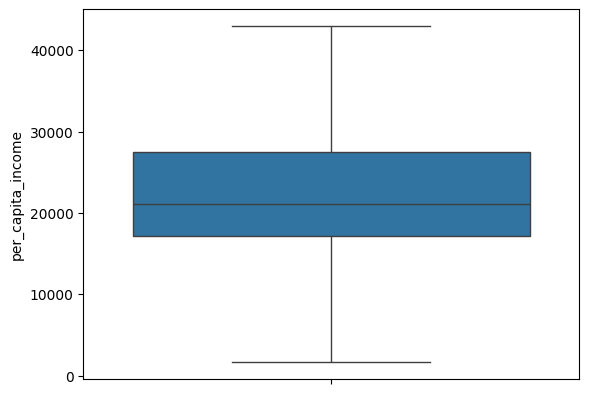

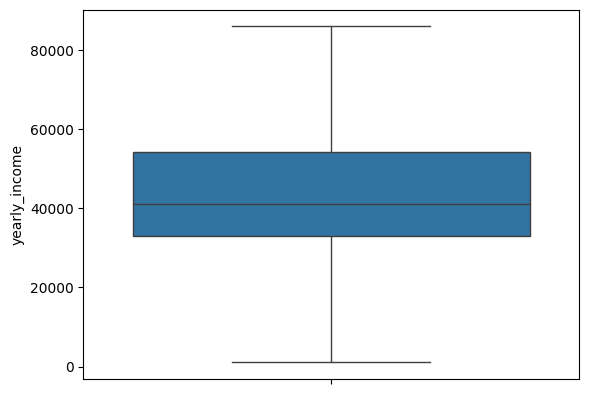

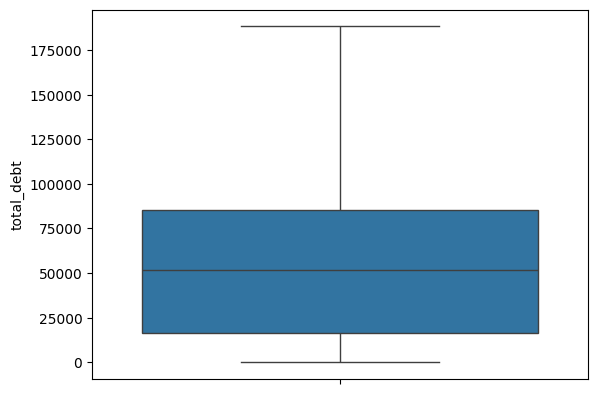

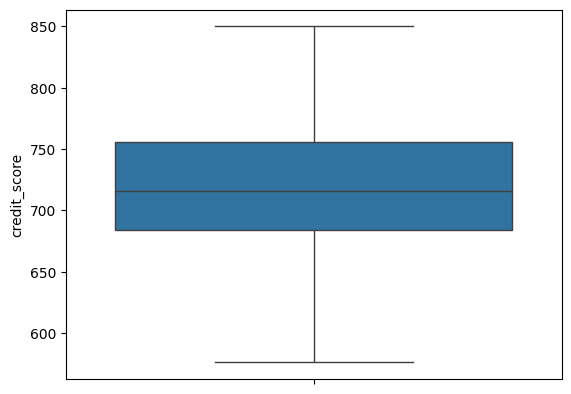

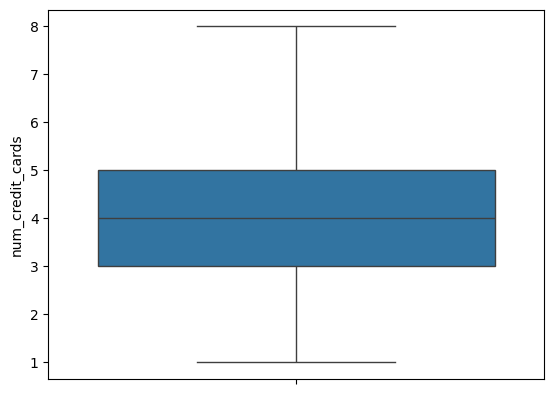

In [31]:
for i in ['amount',  'mcc', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income','total_debt', 'credit_score', 'num_credit_cards']:
    sns.boxplot(df_new[i])
    plt.show()


Normalization, discretization, encoding

In [32]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [33]:
amount_bins = [-1, 25, 75, 150, 300, np.inf]
amount_labels = ["very_low", "low", "medium", "high", "very_high"]

df_new["amount_bin"] = pd.cut(df_new["amount"], bins=amount_bins, labels=amount_labels)

age_bins = [0, 25, 35, 50, np.inf]
age_labels = ["<25", "25-35", "35-50", "50+"]
df_new["age_group"] = pd.cut(df_new["current_age"], bins=age_bins, labels=age_labels)

cs_bins = [0, 580, 670, 740, 800, np.inf]
cs_labels = ["poor", "fair", "good", "very_good", "excellent"]
df_new["credit_band"] = pd.cut(df_new["credit_score"], bins=cs_bins, labels=cs_labels)


In [34]:
df_new["use_chip_flag"] = df_new["use_chip"].map({
    "Chip Transaction": 1,
    "Swipe Transaction": 0
})

df_new["gender_flag"] = df_new["gender"].map({
    "Male": 1,
    "Female": 0
})


In [35]:
df_new = pd.get_dummies(
    df_new,
    columns=["card_brand", "card_type", "amount_bin", "age_group", "credit_band"],
    drop_first=True
)


In [36]:
df_new["use_chip"] = df_new["use_chip"].str.strip()  # clean spaces if any

df_new = pd.get_dummies(df_new, columns=["use_chip"], prefix="use_chip", drop_first=False)


In [37]:
df_new.head(5).T

,0,1,2,3,4
transaction_id,22326462,22326465,22326466,22326467,22326468
date,2019-01-01 00:02:00,2019-01-01 00:05:00,2019-01-01 00:06:00,2019-01-01 00:06:00,2019-01-01 00:10:00
client_id,496,1129,114,641,114
card_id,3186,2677,5283,2774,5283
amount,119.35,100.0,51.71,105.3,82.0
merchant_id,30286,27092,61195,75781,61195
merchant_city,Mesquite,Vista,North Hollywood,Columbus,North Hollywood
merchant_state,TX,CA,CA,OH,CA
zip,75149.0,92084.0,91606.0,43228.0,91606.0
mcc,4814.0,4829.0,5541.0,5411.0,5541.0


In [38]:
# 1. REMOVE ALL ID COLUMNS
df_new = df_new.drop(columns=[
    "transaction_id", "client_id", "card_id", "merchant_id", "merchant_city", "merchant_state", "longitude", "latitude", "zip", "mcc"
])

# 2. REMOVE RAW CATEGORICAL COLUMNS (since you have encoded versions)
df_new = df_new.drop(columns=[
    "card_brand", "card_type", "use_chip", "gender",
    "amount_bin", "age_group", "credit_band"
], errors='ignore')

# 3. HANDLE DATE COLUMN
df_new["hour"] = df_new["date"].dt.hour
df_new["day"] = df_new["date"].dt.dayofweek
df_new["month"] = df_new["date"].dt.month

df_new = df_new.drop(columns=["date"])

# 4. CONFIRM NO OBJECT TYPE COLUMNS REMAIN
print(df_new.dtypes)

# 5. TRAIN/TEST SPLIT
X = df_new.drop(columns=["fraud"])
y = df_new["fraud"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


amount                                float64
fraud                                   int64
expires                        datetime64[ns]
has_chip                                int64
num_cards_issued                        int64
credit_limit                          float64
acct_open_date                 datetime64[ns]
year_pin_last_changed                 float64
card_on_dark_web                        int64
current_age                           float64
retirement_age                        float64
per_capita_income                     float64
yearly_income                         float64
total_debt                            float64
credit_score                          float64
num_credit_cards                      float64
use_chip_flag                         float64
gender_flag                             int64
card_brand_Discover                      bool
card_brand_Mastercard                    bool
card_brand_Visa                          bool
card_type_Debit                   

In [39]:
# Make sure fraud is numeric
df_new["fraud"] = df_new["fraud"].astype(int)

# Keep ONLY numeric + bool columns for modeling
num_cols = df_new.select_dtypes(include=["number", "bool"]).columns

# X = all numeric features except target
X = df_new[num_cols].drop(columns=["fraud"])
y = df_new["fraud"]


In [40]:
df_new.to_csv("cleaned_data1.csv", index=False)

In [41]:
df_model = df_new.dropna()
num_cols = df_model.select_dtypes(include=["number", "bool"]).columns
X = df_model[num_cols].drop(columns=["fraud"])
y = df_model["fraud"]


Train shape: (478475, 37)
Test shape: (205062, 37)

Fraud counts in training set:
fraud
0    477523
1       952
Name: count, dtype: int64

================ CROSS-VALIDATION RESULTS ================

Logistic Regression (UNDER)
accuracy  : 0.6420 ± 0.0018
precision : 0.0038 ± 0.0002
recall    : 0.6875 ± 0.0280
f1        : 0.0076 ± 0.0003
roc_auc   : 0.7261 ± 0.0103

Logistic Regression (OVER)
accuracy  : 0.6477 ± 0.0021
precision : 0.0039 ± 0.0001
recall    : 0.6985 ± 0.0207
f1        : 0.0078 ± 0.0002
roc_auc   : 0.7329 ± 0.0104

Decision Tree (UNDER)
accuracy  : 0.7090 ± 0.0240
precision : 0.0060 ± 0.0005
recall    : 0.8757 ± 0.0151
f1        : 0.0119 ± 0.0009
roc_auc   : 0.8638 ± 0.0104

Decision Tree (OVER)
accuracy  : 0.9844 ± 0.0005
precision : 0.0646 ± 0.0068
recall    : 0.5059 ± 0.0472
f1        : 0.1146 ± 0.0119
roc_auc   : 0.7472 ± 0.0239

================ FINAL TEST RESULTS =================

Logistic Regression (UNDER)
Accuracy: 0.6418

Classification Report:
              p

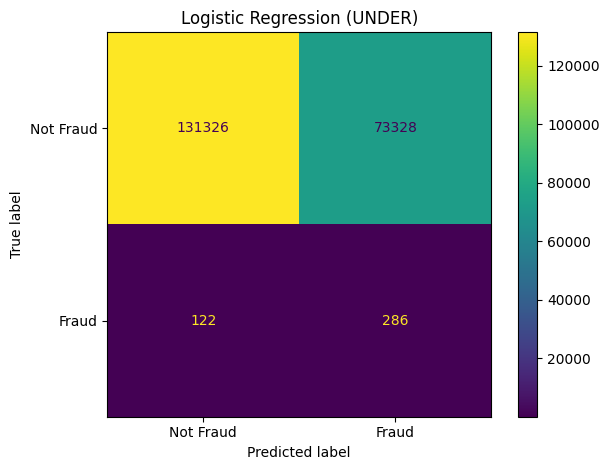


Logistic Regression (OVER)
Accuracy: 0.6524

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9990    0.6523    0.7893    204654
       Fraud     0.0039    0.6863    0.0078       408

    accuracy                         0.6524    205062
   macro avg     0.5015    0.6693    0.3985    205062
weighted avg     0.9971    0.6524    0.7877    205062



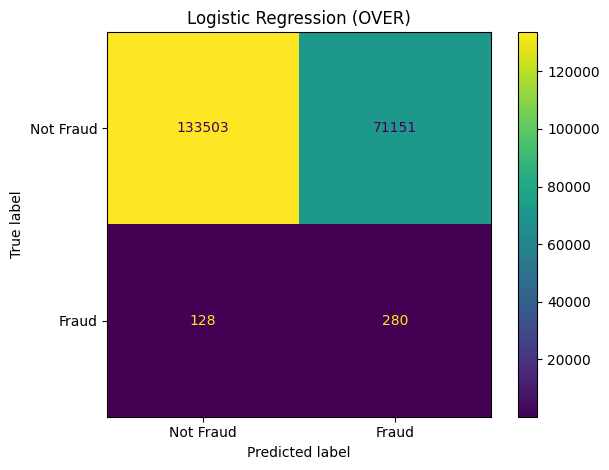


Decision Tree (UNDER)
Accuracy: 0.7303

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9997    0.7300    0.8438    204654
       Fraud     0.0066    0.8995    0.0131       408

    accuracy                         0.7303    205062
   macro avg     0.5032    0.8148    0.4285    205062
weighted avg     0.9977    0.7303    0.8422    205062



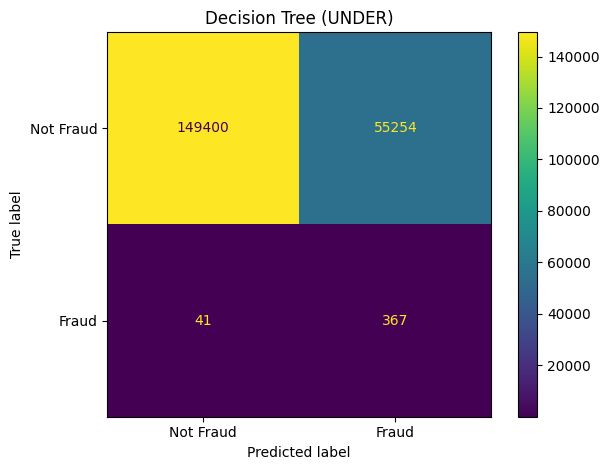


Decision Tree (OVER)
Accuracy: 0.9843

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9989    0.9853    0.9921    204654
       Fraud     0.0601    0.4706    0.1066       408

    accuracy                         0.9843    205062
   macro avg     0.5295    0.7280    0.5493    205062
weighted avg     0.9971    0.9843    0.9903    205062



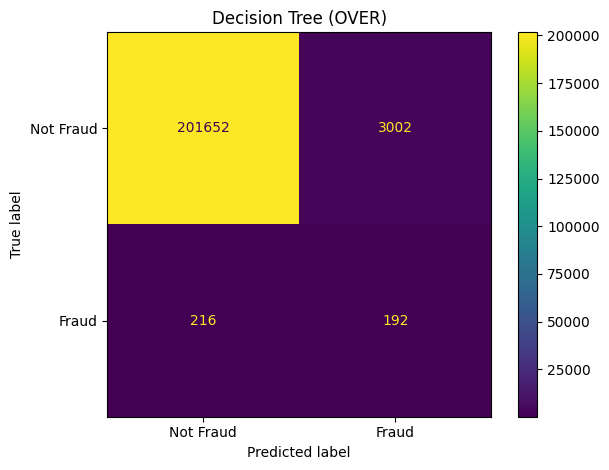


ACCURACY SUMMARY (TEST SET)
                         Model  Accuracy
0  Logistic Regression (UNDER)  0.641816
1   Logistic Regression (OVER)  0.652403
2        Decision Tree (UNDER)  0.730350
3         Decision Tree (OVER)  0.984307


In [42]:
# ============================================================
# IMPORTS
# ============================================================
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline


# ============================================================
# TRAIN / TEST SPLIT (70 / 30, STRATIFIED)
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nFraud counts in training set:")
print(y_train.value_counts())


# ============================================================
# MODELS
# ============================================================

# Logistic Regression — UNDER-sampling
log_reg_under = ImbPipeline([
    ("under", RandomUnderSampler(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

# Logistic Regression — OVER-sampling
log_reg_over = ImbPipeline([
    ("over", RandomOverSampler(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

# Decision Tree — UNDER-sampling
dt_under = ImbPipeline([
    ("under", RandomUnderSampler(random_state=42)),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        min_samples_leaf=50
    ))
])

# Decision Tree — OVER-sampling
dt_over = ImbPipeline([
    ("over", RandomOverSampler(random_state=42)),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        min_samples_leaf=50
    ))
])

models = {
    "Logistic Regression (UNDER)": log_reg_under,
    "Logistic Regression (OVER)":  log_reg_over,
    "Decision Tree (UNDER)":       dt_under,
    "Decision Tree (OVER)":        dt_over
}


# ============================================================
# CROSS-VALIDATION (5-FOLD STRATIFIED)
# ============================================================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy":  "accuracy",
    "precision": "precision",
    "recall":    "recall",
    "f1":        "f1",
    "roc_auc":   "roc_auc"
}

print("\n================ CROSS-VALIDATION RESULTS ================")

for name, model in models.items():
    print("\n" + name)
    scores = cross_validate(
        model,
        X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    
    for metric in scoring:
        mean_ = scores[f"test_{metric}"].mean()
        std_  = scores[f"test_{metric}"].std()
        print(f"{metric:10s}: {mean_:.4f} ± {std_:.4f}")


# ============================================================
# FINAL TEST-SET EVALUATION
# ============================================================

print("\n================ FINAL TEST RESULTS =================")

accuracy_summary = []

for name, model in models.items():
    print("\n" + "="*55)
    print(name)
    print("="*55)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_summary.append((name, acc))
    print(f"Accuracy: {acc:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(
        y_test,
        y_pred,
        digits=4,
        target_names=["Not Fraud", "Fraud"]
    ))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Not Fraud", "Fraud"]
    )
    disp.plot(values_format="d")
    plt.title(name)
    plt.tight_layout()
    plt.show()


# ============================================================
# ACCURACY SUMMARY TABLE
# ============================================================

accuracy_df = pd.DataFrame(
    accuracy_summary,
    columns=["Model", "Accuracy"]
)

print("\nACCURACY SUMMARY (TEST SET)")
print(accuracy_df)


In [43]:
# X, y already defined like you had:
# X = df_model[num_cols].drop(columns=["fraud"])
# y = df_model["fraud"]

from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [44]:
df_model = df_new.dropna()
num_cols = df_model.select_dtypes(include=["number", "bool"]).columns
X = df_model[num_cols].drop(columns=["fraud"])
y = df_model["fraud"]


In [45]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)

import matplotlib.pyplot as plt
import pandas as pd

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nFraud counts in training set:")
print(y_train.value_counts())


Train shape: (478475, 37)
Test shape: (205062, 37)

Fraud counts in training set:
fraud
0    477523
1       952
Name: count, dtype: int64


In [47]:
# take a random subset of e.g. 20,000 rows
sample_df = df_model.sample(n=20000, random_state=42)

num_cols = sample_df.select_dtypes(include=["number", "bool"]).columns
X_small = sample_df[num_cols].drop(columns=["fraud"])
y_small = sample_df["fraud"]


In [48]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


In [50]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier

dt_hybrid = ImbPipeline([
    ("smoteenn", SMOTEENN(random_state=42)),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        min_samples_leaf=50
    ))
])

print("dt_hybrid defined ✅")


dt_hybrid defined ✅


In [51]:
scores = cross_validate(
    dt_hybrid,
    X_small, y_small,
    cv=cv,
    scoring={"accuracy": "accuracy", "precision": "precision", "recall": "recall", "f1": "f1"},
    n_jobs=-1
)

for metric in ["accuracy", "precision", "recall", "f1"]:
    print(f"{metric}: {scores[f'test_{metric}'].mean():.4f}")


accuracy: 0.9733
precision: 0.0134
recall: 0.1176
f1: 0.0239


In [52]:
# Logistic Regression — UNDER-sampling
log_reg_under = ImbPipeline([
    ("under", RandomUnderSampler(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

In [53]:
# Logistic Regression — OVER-sampling
log_reg_over = ImbPipeline([
    ("over", RandomOverSampler(random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

In [54]:
# Decision Tree — UNDER-sampling
dt_under = ImbPipeline([
    ("under", RandomUnderSampler(random_state=42)),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        min_samples_leaf=50
    ))
])

In [55]:
# Decision Tree — OVER-sampling
dt_over = ImbPipeline([
    ("over", RandomOverSampler(random_state=42)),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        min_samples_leaf=50
    ))
])

In [56]:
models = {
    "Logistic Regression (UNDER)": log_reg_under,
    "Logistic Regression (OVER)":  log_reg_over,
    "Decision Tree (UNDER)":       dt_under,
    "Decision Tree (OVER)":        dt_over
}

In [57]:
# ================== CROSS-VALIDATION (5-fold) ==================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy":  "accuracy",
    "precision": "precision",
    "recall":    "recall",
    "f1":        "f1",
    "roc_auc":   "roc_auc"
}

print("\n================ CROSS-VALIDATION RESULTS ================")

cv_results = {}

for name, model in models.items():
    print("\n" + "="*60)
    print(name)
    print("="*60)
    
    scores = cross_validate(
        model,
        X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = scores
    
    for metric in scoring:
        mean_ = scores[f"test_{metric}"].mean()
        std_  = scores[f"test_{metric}"].std()
        print(f"{metric:10s}: {mean_:.4f} ± {std_:.4f}")



================ CROSS-VALIDATION RESULTS ================

Logistic Regression (UNDER)
accuracy  : 0.6420 ± 0.0018
precision : 0.0038 ± 0.0002
recall    : 0.6875 ± 0.0280
f1        : 0.0076 ± 0.0003
roc_auc   : 0.7261 ± 0.0103

Logistic Regression (OVER)
accuracy  : 0.6477 ± 0.0021
precision : 0.0039 ± 0.0001
recall    : 0.6985 ± 0.0207
f1        : 0.0078 ± 0.0002
roc_auc   : 0.7329 ± 0.0104

Decision Tree (UNDER)
accuracy  : 0.7090 ± 0.0240
precision : 0.0060 ± 0.0005
recall    : 0.8757 ± 0.0151
f1        : 0.0119 ± 0.0009
roc_auc   : 0.8638 ± 0.0104

Decision Tree (OVER)
accuracy  : 0.9844 ± 0.0005
precision : 0.0646 ± 0.0068
recall    : 0.5059 ± 0.0472
f1        : 0.1146 ± 0.0119
roc_auc   : 0.7472 ± 0.0239


In [59]:
# ================== CROSS-VALIDATION (5-fold) ==================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy":  "accuracy",
    "precision": "precision",
    "recall":    "recall",
    "f1":        "f1",
    "roc_auc":   "roc_auc"
}

print("\n================ CROSS-VALIDATION RESULTS ================")

cv_results = {}

for name, model in models.items():
    print("\n" + "="*60)
    print(name)
    print("="*60)
    
    scores = cross_validate(
        model,
        X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = scores
    
    for metric in scoring:
        mean_ = scores[f"test_{metric}"].mean()
        std_  = scores[f"test_{metric}"].std()
        print(f"{metric:10s}: {mean_:.4f} ± {std_:.4f}")



================ CROSS-VALIDATION RESULTS ================

Logistic Regression (UNDER)
accuracy  : 0.6420 ± 0.0018
precision : 0.0038 ± 0.0002
recall    : 0.6875 ± 0.0280
f1        : 0.0076 ± 0.0003
roc_auc   : 0.7261 ± 0.0103

Logistic Regression (OVER)
accuracy  : 0.6477 ± 0.0021
precision : 0.0039 ± 0.0001
recall    : 0.6985 ± 0.0207
f1        : 0.0078 ± 0.0002
roc_auc   : 0.7329 ± 0.0104

Decision Tree (UNDER)
accuracy  : 0.7090 ± 0.0240
precision : 0.0060 ± 0.0005
recall    : 0.8757 ± 0.0151
f1        : 0.0119 ± 0.0009
roc_auc   : 0.8638 ± 0.0104

Decision Tree (OVER)
accuracy  : 0.9844 ± 0.0005
precision : 0.0646 ± 0.0068
recall    : 0.5059 ± 0.0472
f1        : 0.1146 ± 0.0119
roc_auc   : 0.7472 ± 0.0239



================ FINAL TEST RESULTS =================

Logistic Regression (UNDER)
Accuracy: 0.6418

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9991    0.6417    0.7815    204654
       Fraud     0.0039    0.7010    0.0077       408

    accuracy                         0.6418    205062
   macro avg     0.5015    0.6713    0.3946    205062
weighted avg     0.9971    0.6418    0.7799    205062

Confusion Matrix:
 [[131326  73328]
 [   122    286]]


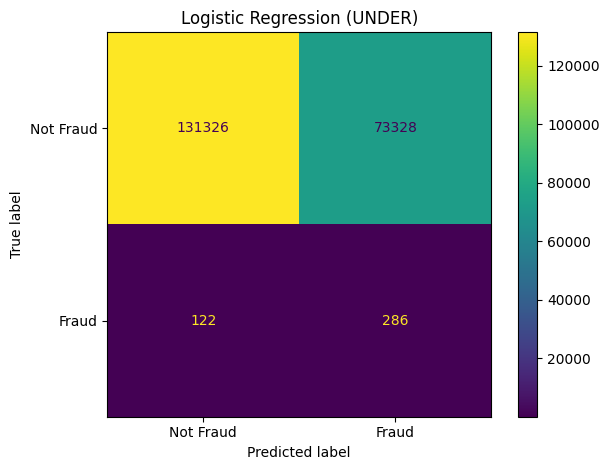


Logistic Regression (OVER)
Accuracy: 0.6524

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9990    0.6523    0.7893    204654
       Fraud     0.0039    0.6863    0.0078       408

    accuracy                         0.6524    205062
   macro avg     0.5015    0.6693    0.3985    205062
weighted avg     0.9971    0.6524    0.7877    205062

Confusion Matrix:
 [[133503  71151]
 [   128    280]]


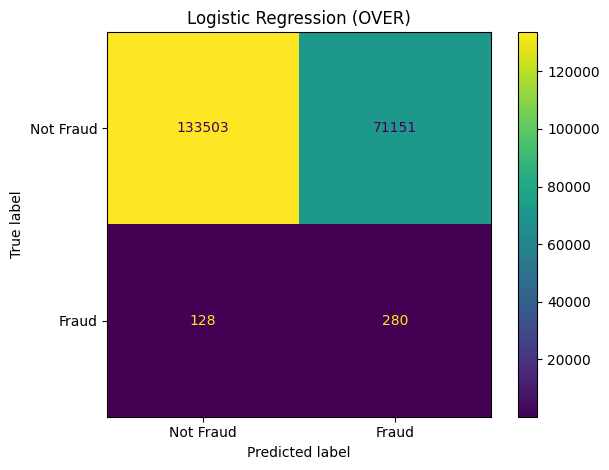


Decision Tree (UNDER)
Accuracy: 0.7303

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9997    0.7300    0.8438    204654
       Fraud     0.0066    0.8995    0.0131       408

    accuracy                         0.7303    205062
   macro avg     0.5032    0.8148    0.4285    205062
weighted avg     0.9977    0.7303    0.8422    205062

Confusion Matrix:
 [[149400  55254]
 [    41    367]]


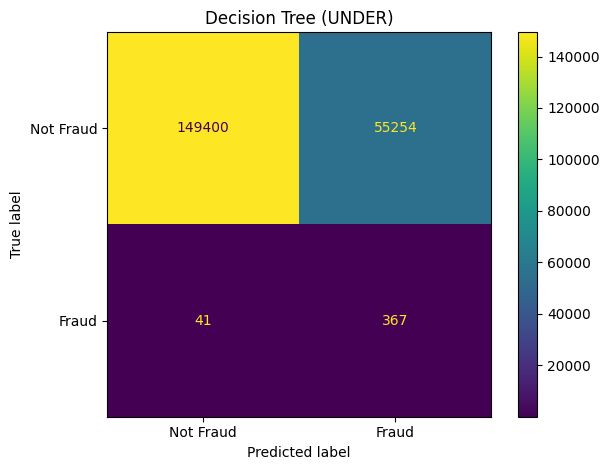


Decision Tree (OVER)
Accuracy: 0.9843

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9989    0.9853    0.9921    204654
       Fraud     0.0601    0.4706    0.1066       408

    accuracy                         0.9843    205062
   macro avg     0.5295    0.7280    0.5493    205062
weighted avg     0.9971    0.9843    0.9903    205062

Confusion Matrix:
 [[201652   3002]
 [   216    192]]


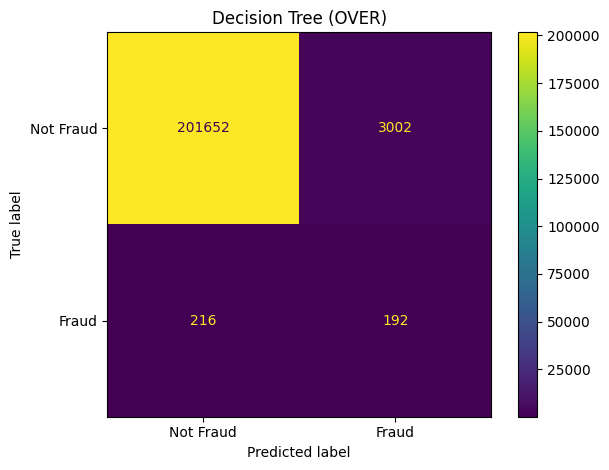


ACCURACY SUMMARY (TEST SET):
                         Model  Accuracy
0  Logistic Regression (UNDER)  0.641816
1   Logistic Regression (OVER)  0.652403
2        Decision Tree (UNDER)  0.730350
3         Decision Tree (OVER)  0.984307


In [60]:
# ================== TEST SET EVALUATION ==================

print("\n================ FINAL TEST RESULTS =================")

accuracy_summary = []

for name, model in models.items():
    print("\n" + "="*60)
    print(name)
    print("="*60)
    
    # Fit on training data (resampling happens inside)
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_summary.append((name, acc))
    print(f"Accuracy: {acc:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(
        y_test,
        y_pred,
        digits=4,
        target_names=["Not Fraud", "Fraud"]
    ))
    
    # Confusion matrix + plot
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Not Fraud", "Fraud"]
    )
    disp.plot(values_format="d")
    plt.title(name)
    plt.tight_layout()
    plt.show()

# ================== ACCURACY SUMMARY TABLE ==================
accuracy_df = pd.DataFrame(accuracy_summary, columns=["Model", "Accuracy"])
print("\nACCURACY SUMMARY (TEST SET):")
print(accuracy_df)


In [61]:
from collections import Counter

X_res, y_res = RandomUnderSampler().fit_resample(X_train, y_train)
print("After UNDER-sampling:", Counter(y_res))

X_res, y_res = RandomOverSampler().fit_resample(X_train, y_train)
print("After OVER-sampling:", Counter(y_res))


After UNDER-sampling: Counter({0: 952, 1: 952})
After OVER-sampling: Counter({0: 477523, 1: 477523})
